<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="healthinsurance.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Insurance Claim Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement
A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurer's management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoker, health conditions and others. Insurance companies apply numerous techniques for analyzing and predicting health insurance costs.

## Data Definition

**age** : Age of the policyholder

**sex:** Gender of policyholder

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight

**children:** Number of children of the policyholder

**smoker:** Indicates policy holder is a smoker or a non-smoker (non-smoker=0;smoker=1)

**region:** The region where the policy holder belongs to (northeast, northwest, southeast, southwest)

**claim:** Claim amount

**bloodpressure:** Bloodpressure reading of policyholder

**diabetes:** Suffers from diabetes or not (non-diabetic=0; diabetic=1)

**regular_ex:** Regularly excercise or not (no-excercise=0; excercise=1)

## Table of Content

1. **[Import Libraries](#import_lib)**
2. **[ Setting options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Data Analysis and Preparation](#data_preparation)**
    - 4.1 - [Understanding the Dataset](#Data_Understanding)
        - 4.1.1 - [Data Types](#Data_Types)
        - 4.1.2 - [Summary Statistics](#Summary_Statistics)
        - 4.1.3 - [Missing Values](#Missing_Values)
        - 4.1.3 - [Missing Values](#Missing_Values)
        - 4.1.4 - [Correlation](#correlation)
        - 4.1.5 - [ Discover Outliers with Visualization](#outliers)
    - 4.2 - [Data Preparation](#Data_Preparation)
        - 4.2.1 - [Check for Normality](#Normality)
        - 4.2.2 - [Shapiro Wilk Test](#ShapiroWilkTest)
        - 4.2.3 - [Log Transform](#Log_Transform)
        - 4.2.4 - [Dummy Encoding of Categorical Variables](#dummy)
5. **[Linear Regression](#LinearRegression)**   
6. **[Result](#result)**
7. **[Conclusion](#conclusion)**

<a id='import_lib'></a>
## 1. Import Libraries

In [0]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns

# Library Math contains mathematical functions in accordance with C standards (C programming standards)
import math as m

## Scikit-learn features various classification, regression and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# To plot the decision tree
from IPython.display import Image  
import pydotplus

<a id='set_options'></a>
## 2. Setting Options

In [0]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

# the path for reading the data file
# Note: Set your path accordingly
# os.chdir('/Users/Regression')

<a id='Read_Data'></a>
## 3. Read Data

In [0]:
# read csv file using pandas
df_insurance = pd.read_csv("healthinsurance.csv")

# to display the top 5 rows of the dataframe
df_insurance.head()

# Note: In order to display more rows, example 10, use head(10)

,age,sex,bmi,children,smoker,region,bloodpressure,diabetes,regular_ex,claim
0,54,female,47.4000000,0,0,southeast,90,1,0,63770.4300000
1,45,male,57.0000000,0,0,southeast,66,1,0,62592.8700000
2,52,male,34.5000000,3,0,northwest,70,0,0,60021.4000000
3,31,female,38.1000000,1,0,northeast,80,1,0,58571.0700000
4,33,female,59.0000000,0,0,northwest,50,1,0,55135.4000000


<a id='data_preparation'></a>
## 4. Data Analysis and Preparation


<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preparation is the process of cleaning and transforming raw data prior to building predictive models. <br><br>
                        Here we will analyze and prepare data to perform regression techniques:<br>
                        1. Check dimensions of the dataframe in terms of rows and columns <Br>
                        2. Check data types. Ensure your data types are correct. Refer data definitions to validate <br>
                        3. If data types are not as per business definition, change the data types as per requirement <br>
                        4. Study summary statistics<br>
                        5. Check for missing values<br>
                        6. Study correlation<br>
                        7. Detect outliers<br><br>
                        Note: it is an art to explore data and one will need more and more practice to gain expertise in this area
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Understanding'></a>
### 4.1 Understanding the Dataset

In [0]:
# display the dimension of the data
df_insurance.shape

(1338, 10)

We see the dataframe has 10 columns and 1338 observations.

<a id='Data_Types'></a>
### 4.1.1 Data Types
The main data types in Pandas dataframes are object, float, int64, bool and datetime64. In order to understand each attribute of our data, it is always good for us to know the data type of each column

In [0]:
# check the datatypes
df_insurance.dtypes

age                int64
sex               object
bmi              float64
children           int64
smoker             int64
region            object
bloodpressure      int64
diabetes           int64
regular_ex         int64
claim            float64
dtype: object

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above output, we see that the data type of "smoker", "diabetes" and "regular_ex" is int64.<br><br>
                        But in reality, "smoker", "diabetes" and "regular_ex" are categorical variables, which are wrongly interpreted as int64, so we will convert these variables data type to object.</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>




<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We will use the .astype() to change the data type.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [0]:
# convert numeric variables to categorical type
df_insurance.smoker = df_insurance.smoker.astype('object')
df_insurance.diabetes = df_insurance.diabetes.astype('object')
df_insurance.regular_ex = df_insurance.regular_ex.astype('object')

Let us now recheck the data types after we have done the conversion in the immediate last step.

In [0]:
# recheck of the datatypes
df_insurance.dtypes

age                int64
sex               object
bmi              float64
children           int64
smoker            object
region            object
bloodpressure      int64
diabetes          object
regular_ex        object
claim            float64
dtype: object

<a id='Summary_Statistics'></a>
### 4.1.2 Summary Statistics

In [0]:
# describe the numerical data
df_insurance.describe()

,age,bmi,children,bloodpressure,claim
count,1338.0000000,1338.0000000,1338.0000000,1338.0000000,1338.0000000
mean,39.2070254,30.8082810,1.0949178,68.9775785,13270.4224141
std,14.0499604,6.2822072,1.2054927,19.3277701,12110.0112397
min,18.0000000,16.0000000,0.0000000,0.0000000,1121.8700000
25%,27.0000000,26.3000000,0.0000000,64.0000000,4740.2875000
50%,39.0000000,30.5000000,1.0000000,72.0000000,9382.0300000
75%,51.0000000,34.8000000,2.0000000,80.0000000,16639.9150000
max,64.0000000,62.0000000,5.0000000,122.0000000,63770.4300000


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
<b>The above output prints the important summary statistics of all the numeric variables like the mean, median (50%), minimum, and maximum values, along with the standard deviation.
If we observe, the average age of a person in the dataset is 39 years. The claim cost is between $1121 to $63770. Here the mean body mass index of a person is 30 (The healthy bmi range is between 25 to 30)</b>     </font>
            </div>
        </td>
    </tr>
</table>

In [0]:
# describe the categorical data
df_insurance.describe(include=object)

# Note: If we do not pass include=object to the describe(), it would return statistics for numeric variables only

,sex,smoker,region,diabetes,regular_ex
count,1338,1338,1338,1338,1338
unique,2,2,4,2,2
top,male,0,southeast,1,0
freq,676,1145,364,920,911


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Here we observe the unique values for all categorical data. The data has been taken from four different regions and most of the data are from southeast region. There are more number of non smokers in the dataset and most of the people are diabetic.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Missing_Values'></a>
### 4.1.3 Missing Values

In [0]:
# check for missing values
missing_values = df_insurance.isnull().sum()

# print the number of missing values of each variable
print(missing_values)

age              0
sex              0
bmi              0
children         0
smoker           0
region           0
bloodpressure    0
diabetes         0
regular_ex       0
claim            0
dtype: int64


We notice there are no missing values in the data.

<a id='correlation'></a>
### 4.1.4 Correlation

Correlation is a statistic that measures the degree to which two variables move in relation to each other. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases. Correction among multiple variables can be represented in the form of a matrix. This allows us to see which pairs have the high correlations. 

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to generate the correlation matrix, we perform the following:<br>
                    1. Filter out only the numeric variables from the dataframe using select_dtypes() function<br>
                    2. Call the corr() which will return the correlation matrix in numerical terms <br>
                    3. You can also pass the output of the corr() to the heatmap() function of the seaborn libray to plot the correlation matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [0]:
# filter the numerical features in the dataset to find the correlation
df_numeric_features = df_insurance.select_dtypes(include=[np.number])

# print the names of the numeric variables that are not part of the df_numeric_features data frame
df_numeric_features.columns

Index(['age', 'bmi', 'children', 'bloodpressure', 'claim'], dtype='object')

The dataframe df_numeric_features has 5 numeric variables.

In [0]:
# to generate the Correlation matrix
df_numeric_features.corr()

,age,bmi,children,bloodpressure,claim
age,1.0000000,0.1040875,0.0424690,-0.0187783,0.2990082
bmi,0.1040875,1.0000000,0.0227024,0.0195265,0.2292824
children,0.0424690,0.0227024,1.0000000,0.0169125,0.0679982
bloodpressure,-0.0187783,0.0195265,0.0169125,1.0000000,0.0036883
claim,0.2990082,0.2292824,0.0679982,0.0036883,1.0000000


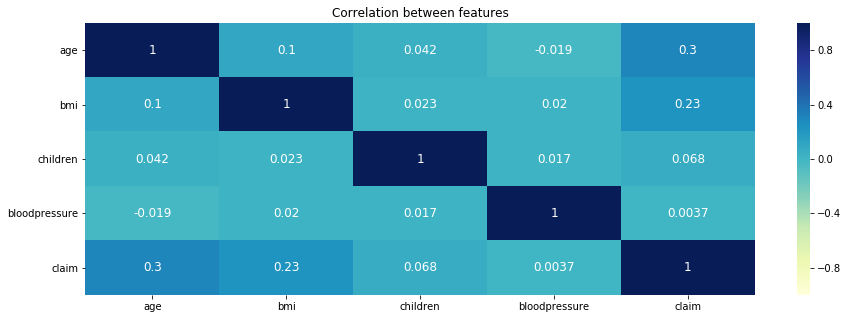

In [0]:
# To get a correlation matrix 
# Ploting correlation plot
corr = df_numeric_features.corr() 
plt.figure(figsize=(15, 5))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws={"size": 12}): Sets the font size of the annotation
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 12})

# specify name of the plot
plt.title('Correlation between features')
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It is seen that the continuous variables are not correlated with each other since all the correlation coefficients are close to zero. Which also indicates that there is no multicollinearity in the data. <br><br>
                        Recollect that one of the assumption of linear regression is that, there shuld be NO multicollinarity present in the data.</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Correlation does not imply causation. In other words, if two variables are correlated it does not mean that one variable caused the other</b> <br><br>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>I love to know more:</b> <br><br>
                    <a href="https://bit.ly/325NEKS">1. Assumptions of Linear Regression <br>
                    <a href="https://bit.ly/2PBvA8T">2. Why Correlation does not Imply Correlation <br>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='outliers'></a>
### 4.1.5. Discover Outliers with Visualization

#### Importance of detecting an outlier
One of the most important tasks from large data sets is to find an outlier, which is defined as a sample or event that is very inconsistent with the rest of the data set. The observation point or value would be distant from the other observations in the data set.

**Recollect that one of the assumption of Linear Regression is there should be no outliers**

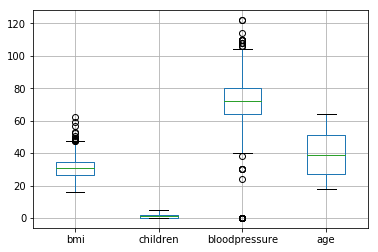

In [0]:
# create a boxplot for all numeric features
df_numeric_features.boxplot(column=['bmi', 'children', 'bloodpressure', 'age'])

# display the plot without any additional text
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above plot, we notice that for the variable bmi there are points above the upper extreme - these points are outliers. Also for the variable bloodpressure, we see there are outliers at both the extremes. <br>

Let us use the IQR method to remove the outliers.</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>



<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Outliers can also be detected using standard deviation method if we know that the distribution of values in the sample is Gaussian or Gaussian-like</b> <br><br>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>I love to know more:  </b><a href="https://bit.ly/33bgNpq">How to Use Statistics to Identify Outliers in Data

</font>
            </div>
        </td>
    </tr>
</table>



<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We shall calculate the IQR and remove the outliers based on IQR method
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [0]:
# drop target variable 
df_numeric_features = df_numeric_features.drop(['claim'], axis=1)

# calculation of interquartile range
Q1 = df_numeric_features.quantile(0.25)
Q3 = df_numeric_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age             24.0000000
bmi              8.5000000
children         2.0000000
bloodpressure   16.0000000
dtype: float64


In [0]:
# remove the outliers from the dataframe
df_final = df_insurance[~((df_insurance < (Q1 - 1.5 * IQR)) |(df_insurance > (Q3 + 1.5 * IQR))).any(axis=1)]

In [0]:
# check the shape
df_final.shape

(1242, 10)

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>So, above output shows there is reduction in the number of rows. Now, to confirm that the outliers have been removed let us visualize the boxplot again.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

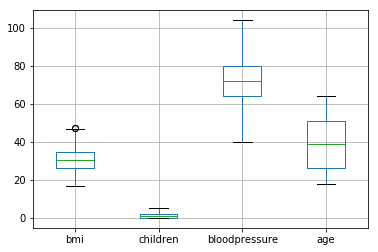

In [0]:
# rechecking for outliers
df_final.boxplot(column=['bmi', 'children', 'bloodpressure', 'age'])

# display only the plot
plt.show()

<a id='Data_Preparation'></a>
## 4.2 Data Preparation

<a id='Normality'></a>
### 4.2.1 Check for Normality

It is not a strict assumption of linear regression for the data to be normally distributed. However, if the data is normally distributed then linear regression tends to perform better.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Let us now see the distribution of our target variable using a histogram. We use the hist() function from the matplotlib library</b>
                </font>
            </div>
        </td>
    </tr>
</table>




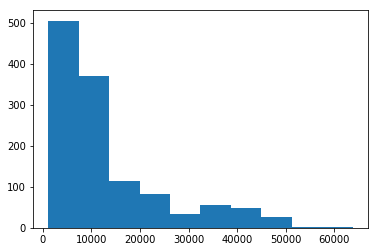

In [0]:
# plot histogram of claim 
pyplot.hist(df_final.claim)

# display just the plot
pyplot.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above plot, we can notice that the variable 'claim' is heavily right skewed and not normally distributed.<br>
</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>




<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We should not only make conclusions through visual representations or only using a statistical test but perform multiple ways to get the best insight.</b>
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
Thus for further statistical confirmation we perform the Shapiro-Wilk test. Shapiro Wilk test is a statistical test for normality
</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='ShapiroWilkTest'></a>
### 4.2.2 Shapiro Wilk Test
(ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)


The null and alternate hypothesis of Shapiro Wilk test are as follows: <BR>
**Ho: The data is normally distributed**</BR><BR>
**Ha: The data is not normally distributed**</BR>


In [0]:
# import shapiro from scipy
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df_final.claim)

# To print the numeric outputs of the shapiro test upto 3 decimal places
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.817, p-value=0.000
Sample does not look Gaussian (reject H0)


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. It can be concluded that the data is not normally distributed.
<br><br>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Shaprio Wilk Test does not work if the number of observations are more than 5000. However Shapiro Wilk test is more robust than other tests. In case where the observations are more than 5000, other tests like Anderson Darling test or Jarque Bera test may also be used.</b>
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Now we opt for log transformation in order to reduce the skewness. We will log transform the claim variable.</b>
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Log_Transform'></a>
### 4.2.3 Log Transform

The log transformation can be used to make highly skewed distributions less skewed. 

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We use np.log() to log transform the claim variable. We also store the transformed variable into our data frame with a new name, log_claim</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [0]:
# log transformation for normality
df_final['log_claim'] = np.log(df_final['claim'])

# display first 5 rows of the data
df_final.head()

,age,sex,bmi,children,smoker,region,bloodpressure,diabetes,regular_ex,claim,log_claim
0,54,female,47.4000000,0,0,southeast,90,1,0,63770.4300000,11.0630449
2,52,male,34.5000000,3,0,northwest,70,0,0,60021.4000000,11.0024564
3,31,female,38.1000000,1,0,northeast,80,1,0,58571.0700000,10.9779962
5,60,male,32.8000000,0,1,southwest,75,0,0,52590.8300000,10.8702970
6,28,male,36.4000000,1,0,southwest,78,1,0,51194.5600000,10.8433886


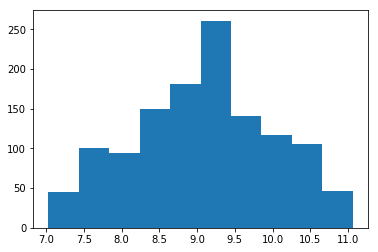

In [0]:
# recheck for normality
# display histogram of the data
pyplot.hist(df_final.log_claim)

# to display on the histogram
pyplot.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be seen that the variable claim is nearly normally distributed. However we again confirm by Shapiro Wilk test.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Lets recollect that the null and alternate hypothesis of Shapiro Wilk test are as follows: <BR>
**Ho: The data is normally distributed**</BR><BR>
**Ha: The data is not normally distributed**</BR>

In [0]:
# rechecking normality by Shapiro Wilk test
statn, pv = shapiro(df_final.log_claim)
print('Statistics=%.3f, p-value=%.3f' % (statn, pv))

# interpret
alpha = 0.05
if pv > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.983, p-value=0.000
Sample does not look Gaussian (reject H0)


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be visually seen that the data has near-normal distribution, but shapiro wilk test does not support the claim.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Let us now proceed to train models. One model with the original claim variable and another model with the log transformed claim variable. We shall begin by fitting a linear regression mode using the method of ordinary least squares.
                    <br><br>However, we need to perform dummy encoding on our categorical variables before we proceed since the method of OLS works only on numeric data. Dummy coding refers to the process of coding a categorical variable into dichotomous variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='dummy'></a>
### 4.2.4 Dummy Encoding of Categorical Variables

To build linear regression models we use OLS method. As seen before in section 3.1.1, it can be seen that some varibles are categorical. The OLS method fails in presence of categorical variables. To overcome this we use dummy coding. 

In [0]:
# Filter the numerical features in the dataset
df_numeric_features = df_final.select_dtypes(include=[np.number])

# display the numeric features
df_numeric_features.columns

Index(['age', 'bmi', 'children', 'bloodpressure', 'claim', 'log_claim'], dtype='object')

In [0]:
# Filter the categorical features in the dataset.
df_categorical_features = df_final.select_dtypes(include=[np.object])

# display categorical features
df_categorical_features.columns

Index(['sex', 'smoker', 'region', 'diabetes', 'regular_ex'], dtype='object')

In [0]:
# create data frame with only categorical variables that have been encoded
for col in df_categorical_features.columns.values:
    dummy_encoded_variables = pd.get_dummies(df_categorical_features[col], prefix=col, drop_first=True)
    df_categorical_features = pd.concat([df_categorical_features, dummy_encoded_variables],axis=1)
    df_categorical_features.drop([col], axis=1, inplace=True)

In [0]:
# concatenate the numerical and dummy encoded categorical variables
df_dummy = pd.concat([df_numeric_features, df_categorical_features], axis=1)

In [0]:
# display data with dummy variables
df_dummy.head() 

,age,bmi,children,bloodpressure,claim,log_claim,sex_male,smoker_1,region_northwest,region_southeast,region_southwest,diabetes_1,regular_ex_1
0,54,47.4000000,0,90,63770.4300000,11.0630449,0,0,0,1,0,1,0
2,52,34.5000000,3,70,60021.4000000,11.0024564,1,0,1,0,0,0,0
3,31,38.1000000,1,80,58571.0700000,10.9779962,0,0,0,0,0,1,0
5,60,32.8000000,0,75,52590.8300000,10.8702970,1,1,0,0,1,0,0
6,28,36.4000000,1,78,51194.5600000,10.8433886,1,0,0,0,1,1,0


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Thus we have obtained the dummy coded variables. <br><br>
                        Note how the categorical variables are dummy encoded creating n-1 variables for each categorical variables where n is the number of classes in each categorical variable. So for variable region, which has 4 levels, it has created 3 dummy encoded variables. Similarly, variable smoker has 2 levels and it has created 1 dummy encoded variable.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>There are various forms of encoding like n-1 dummy encoding, one hot encoding, label encoding, frequency encoding</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>I love to know more:</b> <br><br>
                    <a href="https://bit.ly/36nZQKg">1. FAQ: What is Dummy Coding? <br>
                    <a href="https://bit.ly/2q9Omt9">2. Encoding Categorical Features
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='LinearRegression'></a>
## 5. Linear Regression

In [0]:
# split data into train subset and test subset
df_train, df_test = train_test_split(df_dummy, random_state=1)

# checking the dimensions of the train & test subset
# to print dimension of train set
print(df_train.shape)
# to print dimension of test set
print(df_test.shape)

(931, 13)
(311, 13)


Let us now train the model on the training set.

In [0]:
# extracting the predictor variables from the train set by droping the target variables 
X_train = df_train.drop(['claim','log_claim'], axis=1)

# extracting the target variables from the train set
y_train = df_train ['claim']

lr = LinearRegression()

lr.fit(X_train, y_train)

# print the coefficients output
pd.DataFrame({'attribute': X_train.columns, 'coeff':lr.coef_})

,attribute,coeff
0,age,285.7563845
1,bmi,402.3964151
2,children,593.3345639
3,bloodpressure,35.3356474
4,sex_male,599.8113936
5,smoker_1,19736.0622741
6,region_northwest,-1236.8749475
7,region_southeast,-1754.3437469
8,region_southwest,-1893.4084621
9,diabetes_1,2488.4495571


In [0]:
X_test = df_test.drop(['claim','log_claim'], axis=1)

y_test = df_test['claim']

r_sq_test = lr.score(X_test, y_test)
r_sq_train = lr.score(X_train, y_train)
adj_r_sq_test = 1 - (1-r_sq_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj_r_sq_train = 1 - (1-r_sq_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)


print(f"R_squared = {r_sq_test}")

R_squared = 0.4995287205376686


- With an R_squared value that low, our predictions are no where close to reliable
- However, a single number cannot give us the whole picture
- We shall use a scatter plot between the observed and the actual values to make a better judgment

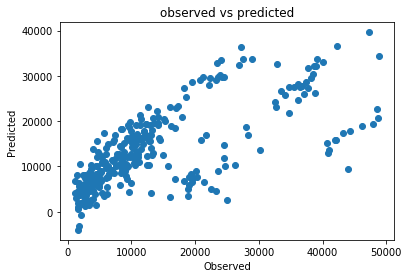

In [0]:
pred =  lr.predict(X_test)


plt.scatter(y_test, pred)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('observed vs predicted')
plt.show()

- For lower values of the target, the model did get make close predictions
- But beyond around 11000, there are a lot of bad predictions
- This is possibly due to the extremely skewed target variable
- Let us see if we can make better predictions by training the model with a log transformed dependant variable

In [0]:
# extracting the predictor variables from the train set by droping the target variables 
X_train = df_train.drop(['claim','log_claim'], axis=1)

# extracting the target variables from the train set
y_train = df_train ['log_claim']

lr_log = LinearRegression()

lr_log.fit(X_train, y_train)

# print the coefficients output
pd.DataFrame({'attribute': X_train.columns, 'coeff':lr_log.coef_})

,attribute,coeff
0,age,0.0375896
1,bmi,0.0188708
2,children,0.1166023
3,bloodpressure,0.0011283
4,sex_male,-0.0413031
5,smoker_1,1.4749505
6,region_northwest,-0.1188935
7,region_southeast,-0.1957647
8,region_southwest,-0.2160311
9,diabetes_1,0.1380277


In [0]:
X_test = df_test.drop(['claim','log_claim'], axis=1)

y_test = df_test['log_claim']

r_sq_test2 = lr_log.score(X_test, y_test)
r_sq_train2 = lr_log.score(X_train, y_train)
adj_r_sq_test2 = 1 - (1-r_sq_test2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj_r_sq_train2 = 1 - (1-r_sq_train2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

print(f"R_squared = {r_sq_test2}")

R_squared = 0.6006853061339572


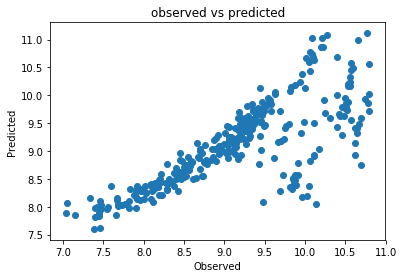

In [0]:
pred =  lr_log.predict(X_test)


plt.scatter(y_test, pred)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('observed vs predicted')
plt.show()

- Our overall R_squared has improved and the scatter plot also looks better
- However again, the model fails at some of the extreme values

<a id='Result'></a>

# Result

In [0]:
pd.DataFrame({'Approach': ['Original dependant variable', 'Log transformed dependant variable'],
             'R_squared on test': [r_sq_test, r_sq_test2],
             'R_squared on train': [r_sq_train, r_sq_train2],
             'adjusted R_squared on test': [adj_r_sq_test, adj_r_sq_test2],
             'adjusted R_squared on train': [adj_r_sq_train, adj_r_sq_train2]})

,Approach,R_squared on test,R_squared on train,adjusted R_squared on test,adjusted R_squared on train
0,Original dependant variable,0.4995287,0.4891209,0.4811167,0.4830059
1,Log transformed dependant variable,0.6006853,0.6538382,0.5859948,0.6496948


<a id='conclusion'></a>
# Conclusion

- Based on the results, the linear regression model gave us better results when the dependant variable was less skewed
- The model performed poorly when the values went extreme, possibly because the model has not seen enough data with extreme values
- Hence, we can have better predictions if we could have more data